In [13]:
import requests
from PIL import Image
import io
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

import http.client, urllib.request, urllib.parse, urllib.error, base64
from array import array
import os
from PIL import Image
import sys
import time

In [14]:
subscription_key = '42f6fb25ddea41638ac14d6c948c5431'

In [15]:
endpoint = 'https://20211212test-kengo.cognitiveservices.azure.com/'

In [16]:
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

In [115]:
uploaded_file = 'objects.jpg'
img = Image.open(uploaded_file)
#img

In [18]:
with open('objects.jpg', 'rb') as f:
    binary_img = f.read()

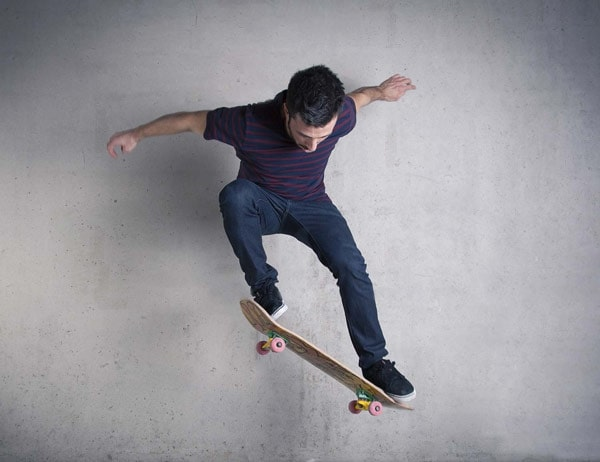

In [19]:
tmpimg2 = Image.open(io.BytesIO(binary_img))#バイナリから画像に変換
tmpimg2

In [53]:
import http.client, urllib.request, urllib.parse, urllib.error, base64

headers = {
    # Request headers
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key,
}

params = urllib.parse.urlencode({
    # Request parameters
    'model-version': 'latest',
})

conn = http.client.HTTPSConnection('westus2.api.cognitive.microsoft.com')
conn.request("POST", "/vision/v3.2/detect?%s" % params,binary_img, headers)
response = conn.getresponse()
print(response.status)
data = response.read()
#検出した物体を矩形で囲む
for object in data.objects:
       draw.rectangle([(object.rectangle.x, object.rectangle.y + object.rectangle.h),(object.rectangle.x + object.rectangle.w,object.rectangle.y)], fill=None, outline='green', width=4)
       txpos = (object.rectangle.x, object.rectangle.y-14-4//2)
       txw,txh = draw.textsize(object.object_property)
       draw.rectangle([txpos, (object.rectangle.x+txw, object.rectangle.y)], outline='green', fill='green', width=4)
       draw.text((object.rectangle.x, (object.rectangle.y)-14-4//2),object.object_property, fill='white')
       img
print(data)
conn.close()

200


AttributeError: 'bytes' object has no attribute 'objects'

In [111]:
import http.client, urllib.request, urllib.parse, urllib.error, base64
import json

headers = {
    # Request headers
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key,
}

params = urllib.parse.urlencode({
    # Request parameters
    'model-version': 'latest',
})

conn = http.client.HTTPSConnection('westus2.api.cognitive.microsoft.com')
conn.request("POST", "/vision/v3.2/detect?%s" % params,binary_img, headers)
response = conn.getresponse()
response = json.load(response) #byte型から辞書型にする
response = response['objects']
#print(response)
#リストから辞書型へ取り出し
for object in response:
    #物体の要素の取り出し
    print(object.get("object"))
    #物体の位置の取り出し
    print(object.get("rectangle"))
    rectangle = object.get("rectangle")
    print(rectangle.get("x"))
print(data)

shirts
{'x': 213, 'y': 85, 'w': 152, 'h': 123}
213
Jeans
{'x': 218, 'y': 179, 'w': 184, 'h': 205}
218
Skateboard
{'x': 238, 'y': 298, 'w': 179, 'h': 118}
238
person
{'x': 116, 'y': 60, 'w': 303, 'h': 326}
116
b'{"objects":[{"rectangle":{"x":213,"y":85,"w":152,"h":123},"object":"shirts","confidence":0.609},{"rectangle":{"x":218,"y":179,"w":184,"h":205},"object":"Jeans","confidence":0.677,"parent":{"object":"Trousers","confidence":0.677}},{"rectangle":{"x":238,"y":298,"w":179,"h":118},"object":"Skateboard","confidence":0.838},{"rectangle":{"x":116,"y":60,"w":303,"h":326},"object":"person","confidence":0.935}],"requestId":"a431375c-aa70-4c4d-a780-a4b35fa883e2","metadata":{"height":462,"width":600,"format":"Jpeg"},"modelVersion":"2021-04-01"}'


shirts
{'x': 213, 'y': 85, 'w': 152, 'h': 123}
Jeans
{'x': 218, 'y': 179, 'w': 184, 'h': 205}
Skateboard
{'x': 238, 'y': 298, 'w': 179, 'h': 118}
person
{'x': 116, 'y': 60, 'w': 303, 'h': 326}


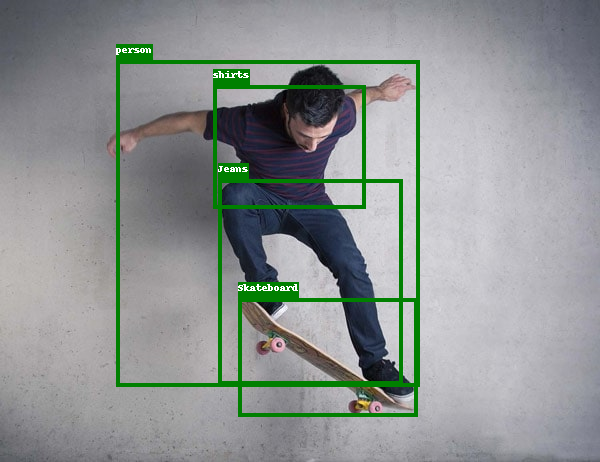

In [123]:
import http.client, urllib.request, urllib.parse, urllib.error, base64
import json

headers = {
    # Request headers
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key,
}

params = urllib.parse.urlencode({
    # Request parameters
    'model-version': 'latest',
})

conn = http.client.HTTPSConnection('westus2.api.cognitive.microsoft.com')
conn.request("POST", "/vision/v3.2/detect?%s" % params,binary_img, headers)
response = conn.getresponse()
response = json.load(response) #byte型から辞書型にする
response = response['objects']
#print(response)
#リストから辞書型へ取り出し
for object in response:
    #物体の要素の取り出し
    #print(object.get("object"))
    #物体の位置の取り出し
    rect = object.get("rectangle")
    
    #物体を矩形で囲む
    draw.rectangle([(rect['x'], rect['y'] + rect['h']),(rect['x'] + rect['w'],rect['y'])], fill=None, outline='green', width=4)
    txpos = (rect['x'], rect['y']-14-4//2)
    txw,txh = draw.textsize(object.get("object"))
    draw.rectangle([txpos, (rect['x']+txw, rect['y'])], outline='green', fill='green', width=4)
    draw.text((rect['x'], rect['y']-14-4//2),object.get("object"), fill='white')
    
img

In [33]:
from PIL import ImageDraw

In [122]:
draw = ImageDraw.Draw(img)

In [ ]:
img = Image.open(uploaded_file)

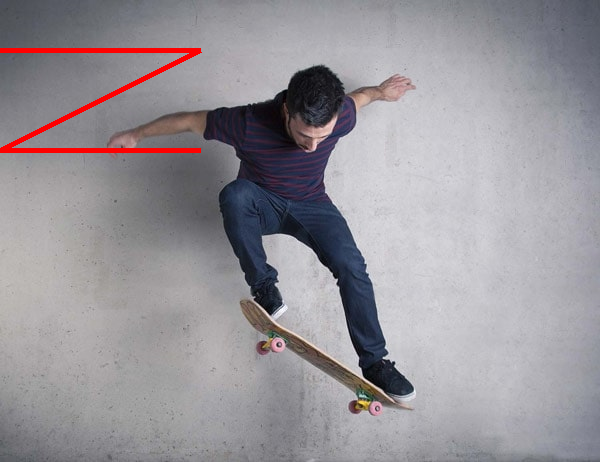

In [35]:

img